<a href="https://colab.research.google.com/github/Madiha64/Madiha-CV-cat-dog-cnn/blob/main/dcgan_on_mnist_dataset_synthetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving knee_half.rar to knee_half.rar


In [ ]:
import os
os.listdir()


['.config', 'knee_half.rar', 'sample_data']

In [ ]:
!apt-get install unrar
!unrar x /content/knee_half.rar /content/data/



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/knee_half.rar

Creating    /content/data                                             OK
Creating    /content/data/knee half                                   OK
Extracting  /content/data/knee half/1.jpg                                  0%  1%  OK 
Extracting  /content/data/knee half/10.jpg                                 2%  3%  OK 
Extracting  /content/data/knee half/11.jpg                                 4%  5%  OK 
Extracting  /content/data/knee half/12.jpg                                 7%  OK 
Extracting  /content/data/knee half/13.jpg                                 7%  8%  OK 
Extracting  /content/data/k

In [ ]:
import os
os.listdir('/content/data')


['knee half']

In [ ]:
import glob
image_paths = glob.glob('/content/data/**/*.*', recursive=True)
image_paths[:5]  # Show first 5 file paths



['/content/data/knee half/17.jpg',
 '/content/data/knee half/1.jpg',
 '/content/data/knee half/36.jpg',
 '/content/data/knee half/28.jpg',
 '/content/data/knee half/60.jpg']

In [ ]:
import cv2 # Import the cv2 library

cv2.imread(image_paths[0])


array([[[32, 32, 32],
        [32, 32, 32],
        [32, 32, 32],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [71, 71, 71]],

       [[32, 32, 32],
        [32, 32, 32],
        [32, 32, 32],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [71, 71, 71]],

       [[32, 32, 32],
        [32, 32, 32],
        [32, 32, 32],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [71, 71, 71]],

       ...,

       [[32, 32, 32],
        [32, 32, 32],
        [32, 32, 32],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [18, 18, 18]],

       [[32, 32, 32],
        [32, 32, 32],
        [32, 32, 32],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [18, 18, 18]],

       [[32, 32, 32],
        [32, 32, 32],
        [32, 32, 32],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [18, 18, 18]]], dtype=uint8)

In [ ]:
len(image_paths)

60

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 5 completed


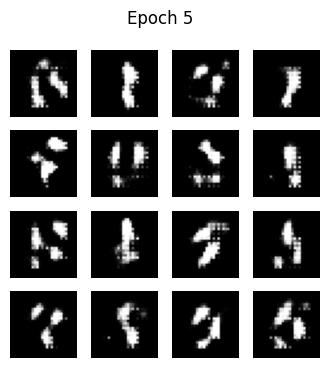

Epoch 10 completed


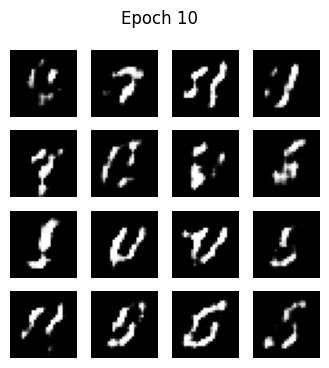

Epoch 15 completed


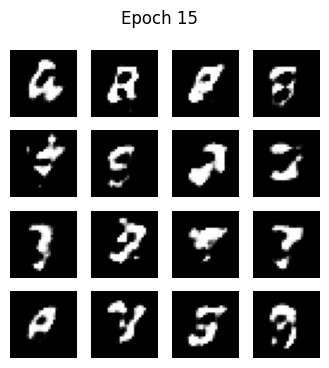

Epoch 20 completed


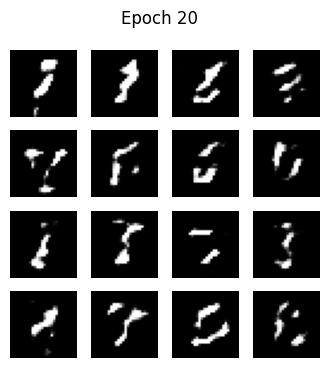

Epoch 25 completed


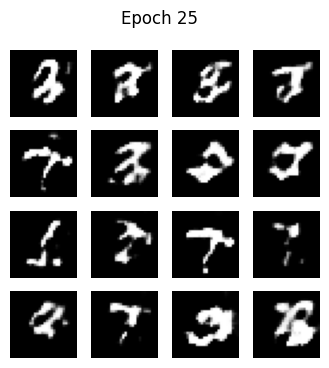

Epoch 30 completed


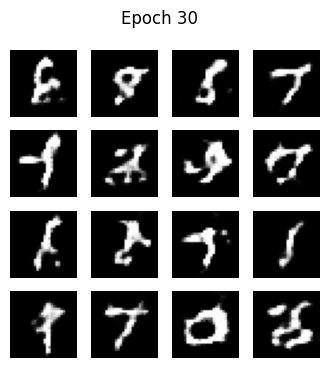

Epoch 35 completed


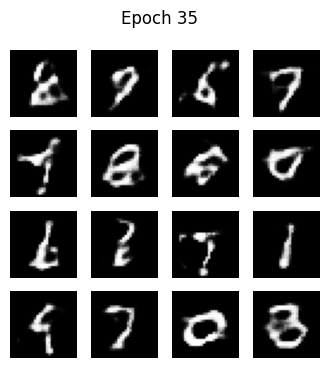

Epoch 40 completed


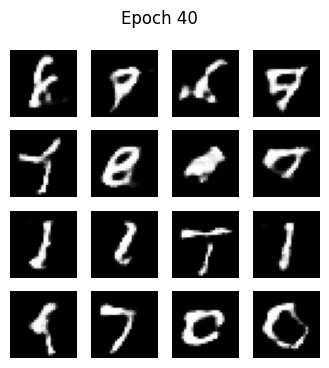

Epoch 45 completed


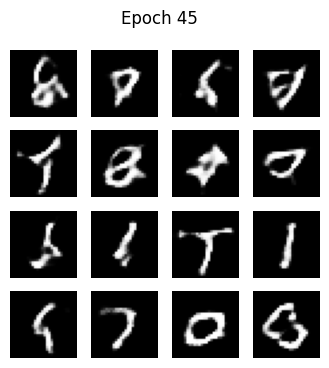

Epoch 50 completed


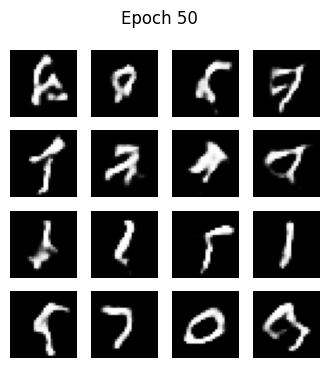

In [3]:
# just create the mnist synthesis example

# Step 1: Imports
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load and preprocess MNIST
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32")
x_train = x_train / 255.0

BUFFER_SIZE = 60000
BATCH_SIZE = 256
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Step 3: Generator Model
def make_generator_model():
    model = tf.keras.Sequential([
        layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='sigmoid')
    ])
    return model

# Step 4: Discriminator Model
def make_discriminator_model():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(1)
    ])
    return model

# Step 5: Losses and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator = make_generator_model()
discriminator = make_discriminator_model()

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Step 6: Training loop setup
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16
seed = tf.random.normal([num_examples_to_generate, noise_dim])

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
  # Step 7: Generate and display
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    predictions = predictions.numpy().squeeze()
    fig, axs = plt.subplots(4, 4,figsize=(4,4))
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(predictions[i * 4 + j], cmap='gray')
            axs[i, j].axis('off')

    plt.suptitle(f"Epoch {epoch}")
    plt.show()


# Step 8: Train
def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            train_step(image_batch)

        # Display every 5 epochs
        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch + 1} completed")
            generate_and_save_images(generator, epoch + 1, seed)

train(train_dataset, EPOCHS)


# New Section

# New Section